In [21]:
%matplotlib inline
import netCDF4 
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

Location: Golfo de Penas (chilean Patagonia).

Geo-cordinates (image subset):
- NLb = -44.531
- WLb = -75.854
- SLb = -47.584
- ELb = -74.462

**DATE: 2022/02/21**

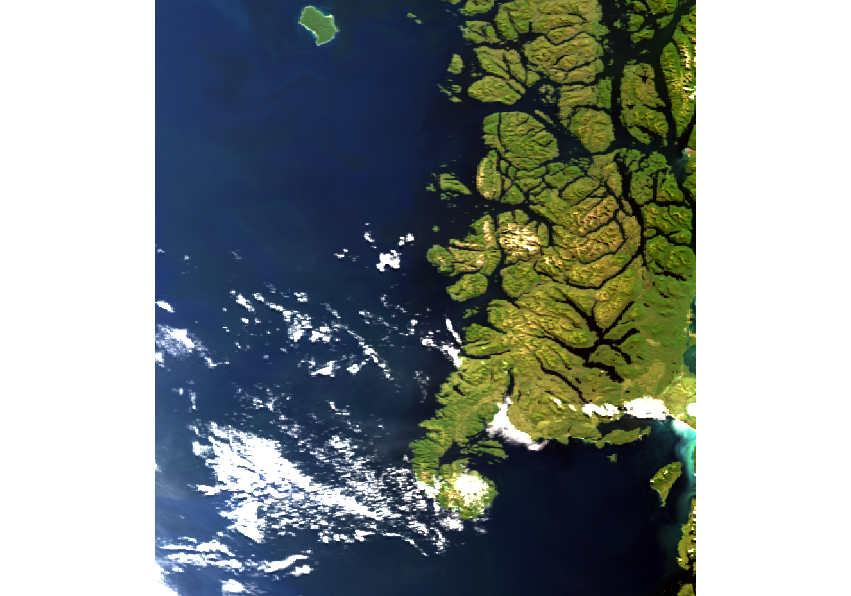

In [14]:
# Xarray dataset from SNAP (Sentinel Application Plataform) C2RCC Processor
file = 'subset3_20220221T134513_C2RCC.nc'
ds = xr.open_dataset(file)
print('data size:',ds.nbytes/1e6, 'MB')
ds

data size: 140.79924 MB


<xarray.Dataset>
Dimensions:                                            (y: 929, x: 842)
Coordinates:
    lat                                                (y, x) float64 ...
    lon                                                (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables: (12/41)
    conc_tsm                                           (y, x) float32 ...
    conc_chl                                           (y, x) float32 ...
    unc_tsm                                            (y, x) float32 ...
    unc_chl                                            (y, x) float32 ...
    TP_latitude                                        (y, x) float32 ...
    TP_longitude                                       (y, x) float32 ...
    ...                                                 ...
    horizontal_wind_vector_1                           (y, x) float32 ...
    horizontal_wind_vector_2                           (y, x) float32 ...
    humidity                                           (y, x) float32 ...
    sea_level_pressure                                 (y, x) float32 ...
    total_columnar_water_vapour                        (y, x) float32 ...
    total_ozone                                        (y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     465:421
    start_date:   21-FEB-2022 13:45:57.910704
    stop_date:    21-FEB-2022 13:46:38.761768

In [15]:
# Checking all variables
nc = netCDF4.Dataset(file, mode='r')
nc.variables.keys()

dict_keys(['conc_tsm', 'conc_chl', 'unc_tsm', 'unc_chl', 'TP_latitude', 'TP_longitude', 'OAA', 'OZA', 'SAA', 'SZA', 'atmospheric_temperature_profile_pressure_level_1', 'atmospheric_temperature_profile_pressure_level_2', 'atmospheric_temperature_profile_pressure_level_3', 'atmospheric_temperature_profile_pressure_level_4', 'atmospheric_temperature_profile_pressure_level_5', 'atmospheric_temperature_profile_pressure_level_6', 'atmospheric_temperature_profile_pressure_level_7', 'atmospheric_temperature_profile_pressure_level_8', 'atmospheric_temperature_profile_pressure_level_9', 'atmospheric_temperature_profile_pressure_level_10', 'atmospheric_temperature_profile_pressure_level_11', 'atmospheric_temperature_profile_pressure_level_12', 'atmospheric_temperature_profile_pressure_level_13', 'atmospheric_temperature_profile_pressure_level_14', 'atmospheric_temperature_profile_pressure_level_15', 'atmospheric_temperature_profile_pressure_level_16', 'atmospheric_temperature_profile_pressure_lev

In [16]:
# Variables of interest
con_chl = nc.variables['conc_chl']
con_tsm = nc.variables['conc_tsm']

In [17]:
chl = np.array(con_chl)
tsm = np.array(con_tsm)

In [18]:
# DataFrame with chl and tsm values 
df = pd.DataFrame(data={'chl' : chl.flatten(), 'tsm' : tsm.flatten()})

In [19]:
df.describe()

,chl,tsm
count,782218.000000,782218.000000
mean,4.339548,4.410128
std,9.744105,18.900848
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.082871,0.781754
75%,3.209907,1.427131
max,88.266090,320.664246


In [22]:
# uncertainty or error of chl and tsm values
u_chl = nc.variables['unc_chl']
u_tsm = nc.variables['unc_tsm']

In [23]:
chl_unc = np.array(u_chl)
tsm_unc = np.array(u_tsm)

In [24]:
# Dataframe
df_u = pd.DataFrame(data={'chl_unc' : chl_unc.flatten(), 'tsm_unc' : tsm_unc.flatten()})

In [25]:
df_u.describe()

,chl_unc,tsm_unc
count,782218.000000,782218.000000
mean,0.452763,0.590974
std,0.975451,2.846665
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.192983,0.075691
75%,0.303431,0.172400
max,20.792131,87.440926


### Chlorophyll a

(array([[832.,  11.,   5., ...,   0.,   0.,   0.],
        [835.,   8.,   5., ...,   0.,   0.,   0.],
        [835.,   9.,   5., ...,   1.,   0.,   0.],
        ...,
        [918.,   8.,   2., ...,   0.,   0.,   0.],
        [916.,   7.,   2., ...,   0.,   0.,   0.],
        [910.,  13.,   3., ...,   0.,   0.,   0.]]),
 array([ 0.      ,  8.826609, 17.653217, 26.479828, 35.306435, 44.133045,
        52.959656, 61.786263, 70.61287 , 79.43948 , 88.26609 ],
       dtype=float32),
 <a list of 842 BarContainer objects>)

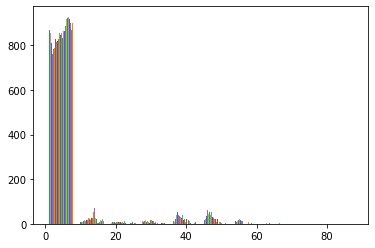

In [27]:
# quick view of values distribution
plt.hist(chl)

In [28]:
# chl concentration under 5 mg m-3
chl_values = df.chl[df["chl"]<=5.00]

In [29]:
chl_values.describe()

count    700272.000000
mean          1.698267
std           1.353467
min           0.000000
25%           0.000000
50%           1.845233
75%           2.865042
max           4.998534
Name: chl, dtype: float64

In [30]:
# chl concentration over 5 mg m-3
chl_high_values = df.chl[df["chl"]>=5.00]

In [31]:
chl_high_values.describe()

count    81946.000000
mean        26.910797
std         17.943174
min          5.000741
25%          8.864501
50%         25.168859
75%         44.051971
max         88.266090
Name: chl, dtype: float64

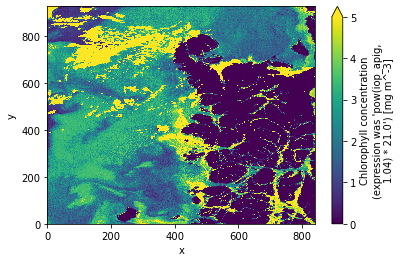

In [32]:
# Chlorophyll a map with matplotlib
ds.conc_chl.plot(vmin = 0, vmax = 5)

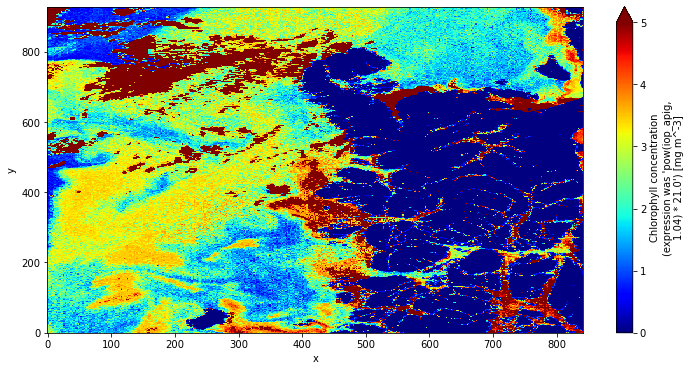

In [33]:
# another map
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_chl.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP picture chlorophyll a concentration


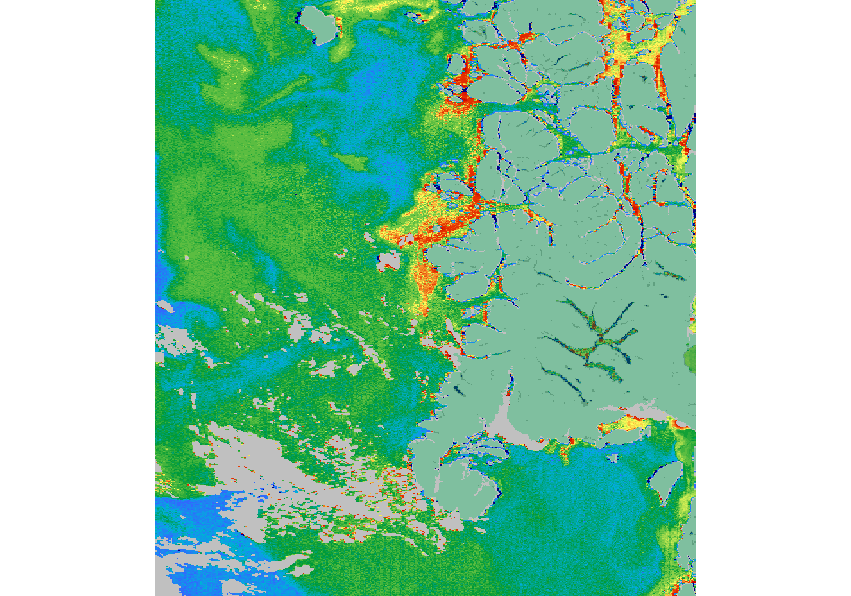

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


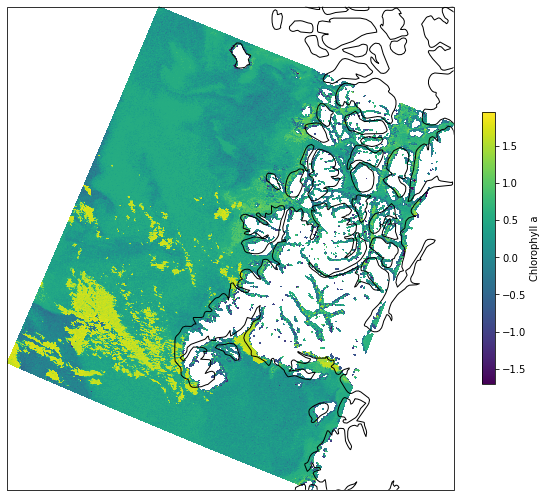

In [34]:
#Log10 scale of chlorophyll a map

import rasterio
import cartopy.crs as ccrs
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()

plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)


# defining the variables to plot
## log transformation
conc_chl = np.log10(ds.conc_chl)
lat = ds.lat
lon = ds.lon

plt.pcolor(lon, lat, conc_chl, transform = data_crs)

plt.colorbar(label = 'Chlorophyll a', shrink=0.5)

ax.coastlines('10m')

plt.show()

#### TSM (Total Suspended Matter)

(array([[873.,  43.,   9., ...,   0.,   0.,   0.],
        [872.,  43.,  10., ...,   0.,   0.,   0.],
        [874.,  39.,  13., ...,   0.,   0.,   0.],
        ...,
        [915.,   0.,   0., ...,   9.,   1.,   0.],
        [915.,   1.,   0., ...,   8.,   1.,   0.],
        [911.,   1.,   0., ...,  13.,   0.,   0.]]),
 array([  0.      ,  32.066425,  64.13285 ,  96.19927 , 128.2657  ,
        160.33212 , 192.39854 , 224.46497 , 256.5314  , 288.5978  ,
        320.66425 ], dtype=float32),
 <a list of 842 BarContainer objects>)

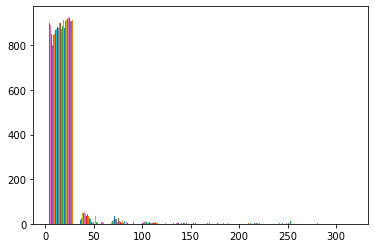

In [35]:
# quick view of values distribution
plt.hist(tsm)

In [36]:
# tsm concentration under 20 g m-3
tsm_values = df.tsm[df["tsm"]<=20.00]

In [37]:
tsm_values.describe()

count    745292.000000
mean          1.033837
std           1.687006
min           0.000000
25%           0.000000
50%           0.734227
75%           1.319465
max          19.998478
Name: tsm, dtype: float64

In [38]:
# tsm concentration over 20 g m-3
tsm_high_values = df.tsm[df["tsm"]>=20.00]

In [39]:
tsm_high_values.describe()

count    36926.000000
mean        72.557091
std         51.435814
min         20.001041
25%         39.348611
50%         56.858620
75%         84.381491
max        320.664246
Name: tsm, dtype: float64

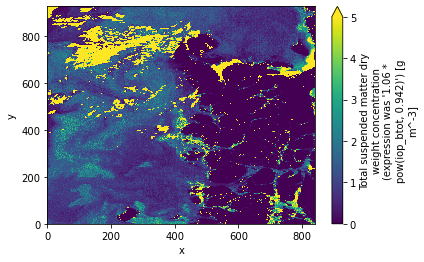

In [43]:
# TSM map with matplotlib
ds.conc_tsm.plot(vmin = 0, vmax = 5)

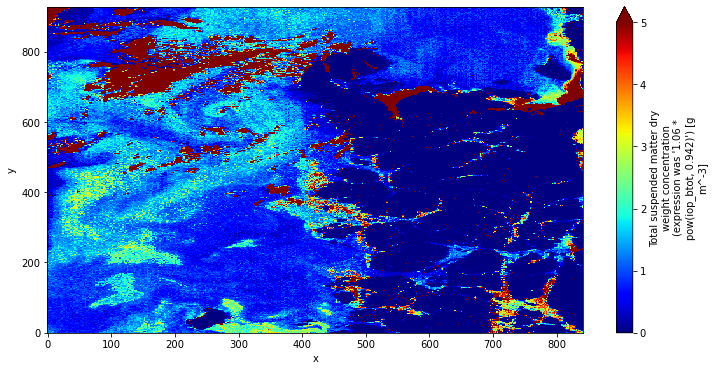

In [42]:
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_tsm.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP picture TSM concentration

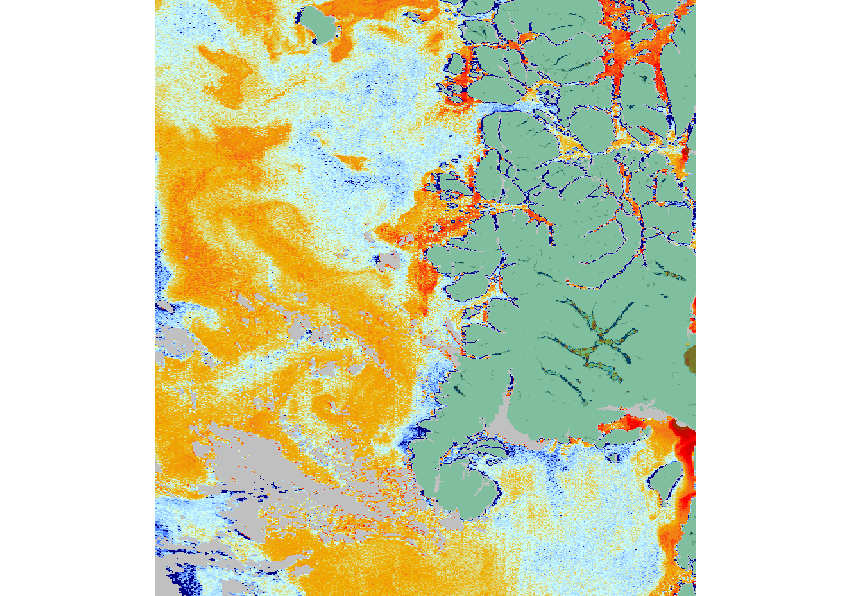